In [1]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=e568ceee8d489c6bf530e4cc59c44f2ac112eea2db777cdd714bac2a50c6ffbe
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [2]:
!pip install matplotlib

In [3]:
!pip install opencv-python

In [4]:
from deepface import DeepFace
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "Dlib", "ArcFace"]

In [41]:
img1 = "/content/drive/MyDrive/banding/mike.jpeg"

In [42]:
image = DeepFace.detectFace(img1)

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


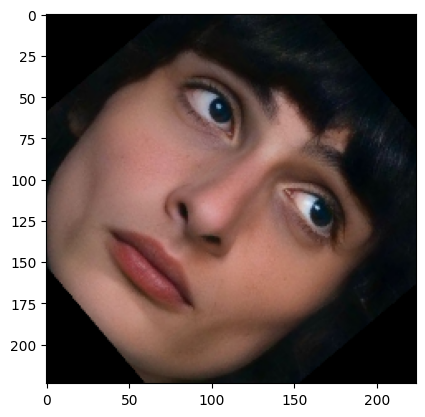

In [15]:
plt.imshow(image)

In [24]:
df = DeepFace.find(img_path=img1, db_path = '/content/drive/MyDrive/banding', model_name = models[0], enforce_detection=False)

There are  1  representations found in  representations_vgg_face.pkl
find function lasts  1.9341025352478027  seconds


In [25]:
df

[                                   identity  source_x  source_y  source_w  \
 0  /content/drive/MyDrive/banding/mike.jpeg       347       142       454   
 
    source_h  VGG-Face_cosine  
 0       454     2.220446e-16  ]

In [26]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))   # ubah ini jadi find
        if img is not None:
            images.append(img)
    return images


*   Load image dari folder
*   find image dari dataset
*   verify image hasil find dengan target
*   hitung akurasi (correct/total)



In [28]:
images = load_images_from_folder("/content/drive/MyDrive/Testing")

In [27]:
images

[array([[[145, 166, 198],
         [145, 166, 198],
         [132, 153, 185],
         ...,
         [141, 160, 198],
         [141, 158, 197],
         [154, 171, 210]],
 
        [[134, 155, 187],
         [127, 148, 180],
         [121, 142, 174],
         ...,
         [145, 164, 202],
         [136, 153, 192],
         [148, 165, 204]],
 
        [[135, 156, 188],
         [123, 144, 176],
         [127, 148, 180],
         ...,
         [142, 161, 199],
         [144, 161, 200],
         [163, 180, 219]],
 
        ...,
 
        [[ 39,  44,  77],
         [ 52,  56,  85],
         [ 72,  76, 101],
         ...,
         [ 20,  62, 175],
         [ 20,  61, 177],
         [ 22,  63, 179]],
 
        [[ 36,  39,  70],
         [ 47,  51,  80],
         [ 68,  72,  96],
         ...,
         [ 17,  59, 172],
         [ 23,  65, 178],
         [ 33,  75, 188]],
 
        [[ 31,  34,  65],
         [ 41,  45,  73],
         [ 62,  64,  88],
         ...,
         [ 28,  70, 183],
  

In [29]:
def verify(img1_path,img2_path, model_name):
    img1= cv2.imread(img1_path)
    img2= cv2.imread(img2_path)

    plt.imshow(img1[:,:,::-1])
    plt.show()
    plt.imshow(img2[:,:,::-1])
    plt.show()

    output = DeepFace.verify(img1_path,img2_path, model_name=model_name)
    print(output)

    verification = output['verified']

    if verification:
       print('Benar')
    else:
       print('Salah')

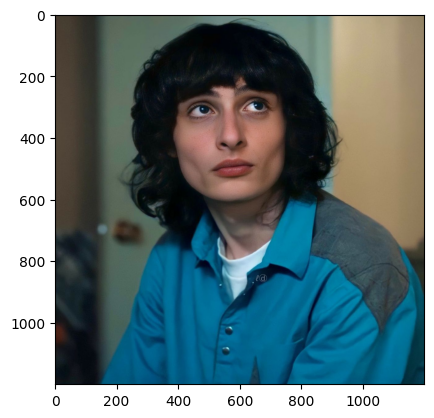

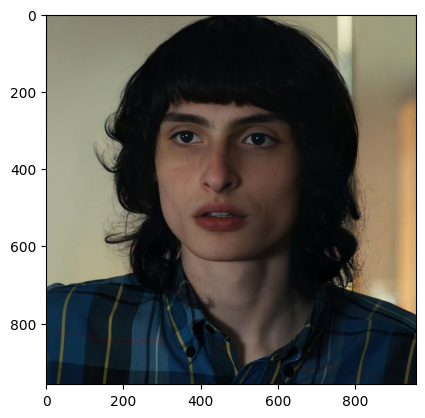

{'verified': True, 'distance': 0.39257008514235125, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 347, 'y': 142, 'w': 454, 'h': 454}, 'img2': {'x': 207, 'y': 135, 'w': 494, 'h': 494}}, 'time': 2.19}
Benar


In [44]:
verify("/content/drive/MyDrive/banding/mike.jpeg","/content/drive/MyDrive/banding/mikee.jpeg", model_name = models[0])